In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style

from welly import Well
from pypozo import visualpozo
from pypozo.processpozo import processdata
from sklearn.preprocessing import StandardScaler

In [26]:
def scatterplot_2d(pozo, registro1, registro2):
    """
    Esta función traza un diagrama de dispersión 2D entre dos curvas.
    Utiliza los mnemónicos de las curvas para graficarlas.
    """
    style.use('Solarize_Light2')

    figsize = (6, 8)
    dpi = 120
    font_title = {'family': 'monospace', 'weight': 'bold', 'size': 20}
    font_axis = {'family': 'monospace', 'weight': 'bold', 'size': 15}
    
    nombre = pozo.name
    registro1 = pozo.data[registro1]
    registro2 = pozo.data[registro2]
    profundidad = np.arange(registro1.start, registro1.stop, registro1.step)
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    
    # Realizar el scatter plot y almacenar el objeto scatter
    scatter = ax.scatter(registro1.values, profundidad, c=registro2.values, cmap='viridis')
    
    # Añadir la colorbar
    cbar = fig.colorbar(scatter, ax=ax)
    cbar.set_label('{} [{}]'.format(registro2.mnemonic, registro2.units), fontdict=font_axis)
    
    ax.set_xlabel('{} [{}]'.format(registro1.mnemonic, registro1.units), fontdict=font_axis)
    ax.set_ylabel('Depth [m]', fontdict=font_axis)
    ax.set_title('{} vs {}'.format(registro1.mnemonic, registro2.mnemonic), fontdict=font_title)
    ax.grid()
    plt.suptitle('---------------------------------------------------------------------------------------------------------------------------------------\n'
                 '|{}|\n'
                 '---------------------------------------------------------------------------------------------------------------------------------------\n\n'.format(nombre))
    plt.show()

In [3]:
def correlation(registro1, registro2):
    data1 = registro1.values
    data2 = registro2.values
    
    

In [4]:
def transform_data(registro, transformation):
    arr = registro.values
    arr = np.array(arr)
    if transformation == 'sqrt':
        arr2 = np.sqrt(arr)
    elif transformation == 'log':
        arr2 = np.log(arr)
    else:
        raise ValueError("Invalid transformation. Please choose 'sqrt' or 'log'.")
    
    fig, ax = plt.subplots(1,2, figsize = (9,4), dpi = 150, sharey = True)
    # Plot histogram of original data
    ax[0].hist(arr, bins=10, color='blue', alpha=0.5, label='Original Data')
    # Plot histogram of transformed data
    ax[1].hist(arr2, bins=10, color='red', alpha=0.5, label='Transformed Data')
    
    for i in range(2):
        ax[i].set_xlabel('Value')
        ax[i].set_ylabel('Frequency')
        ax[i].set_title('Histogram of Data')
        ax[i].legend()
    
    plt.show()
    return arr

In [5]:
def normalize_data(registro):
    arr = registro.values
    arr = np.array(arr)
    arr = arr.reshape(-1, 1)
    scaler = StandardScaler()
    arr = scaler.fit_transform(arr)
    return arr

In [6]:
ruta = "/Users/Chemitas/Desktop/Desk/proyectos/encubadora/pypozo/data/ABEDUL1_REPROCESADO.las"
ruta2 = "/Users/Chemitas/Desktop/Desk/proyectos/encubadora/pypozo/data/PALOBLANCO791_REPROCESADO.las"

In [7]:
pozo = Well.from_las(ruta)

In [8]:
pozo

Well(uwi: '', name: 'ABEDUL-1', 3 curves: ['GR', 'NEUT', 'VSH-LAR'])

In [9]:
vsh = pozo.data['VSH-LAR']
gr = pozo.data['GR']

/Users/Chemitas/anaconda3/lib/python3.11/site-packages/welly/curve.py:470: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  if self.df.index.is_numeric() and not self.df.index.empty:


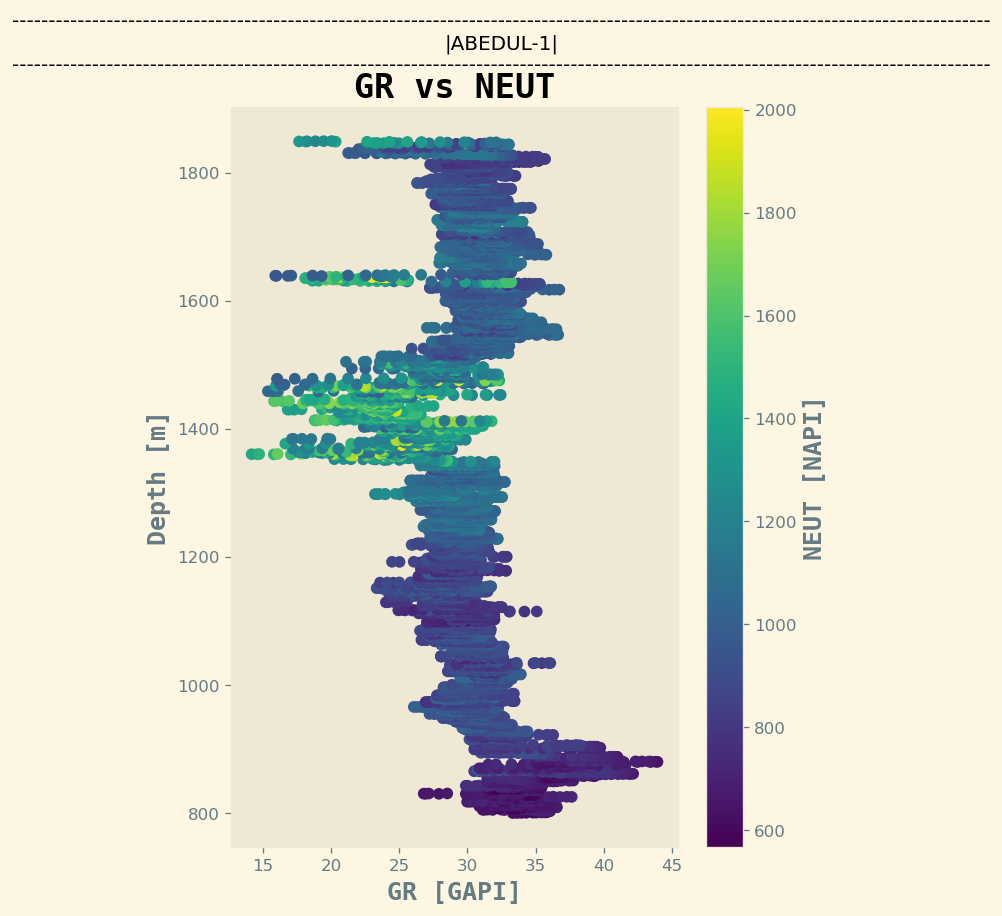

In [27]:
scatterplot_2d(pozo, 'GR', 'NEUT')

In [ ]:
df = 

In [22]:
corr = (gr.values).corr(vsh.values)

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

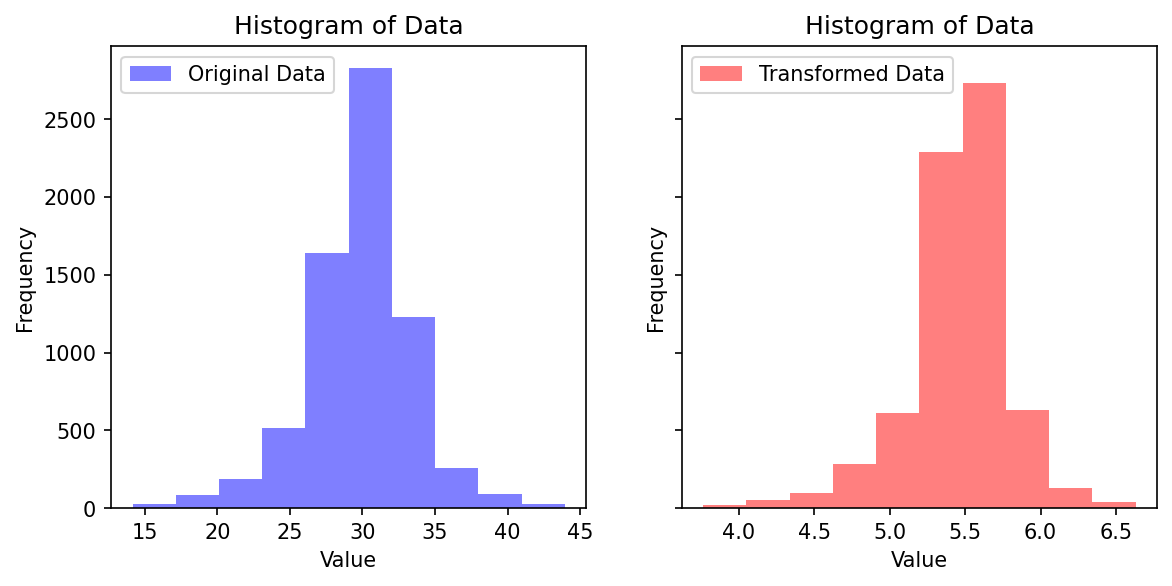

array([33.3333, 33.6574, 33.9816, ..., 18.8387, 19.4462, 20.0269])

In [24]:
transform_data(gr, 'sqrt')

In [16]:
profundidad = np.arange(gr.start, gr.stop, gr.step)

/Users/Chemitas/anaconda3/lib/python3.11/site-packages/welly/curve.py:470: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  if self.df.index.is_numeric() and not self.df.index.empty:


In [11]:
gr_norm = normalize_data(gr)

<Axes: title={'center': 'VSH-LAR'}, xlabel='V/V'>

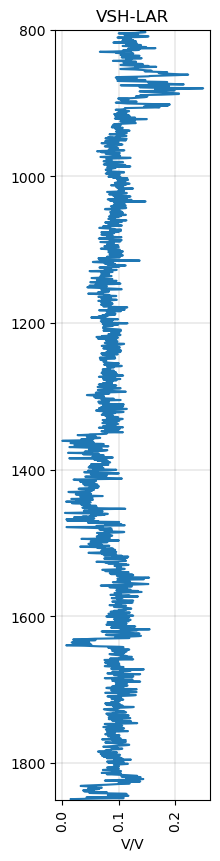

In [14]:
vsh.plot()

<Axes: title={'center': 'GR'}, xlabel='GAPI'>

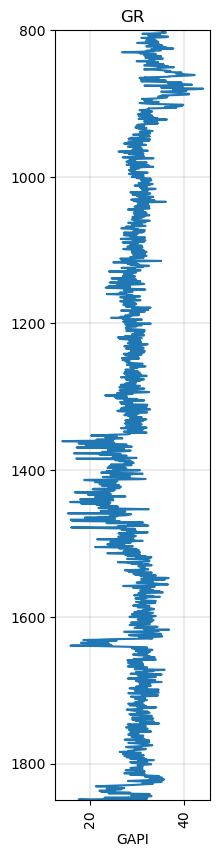

In [16]:
gr.plot()

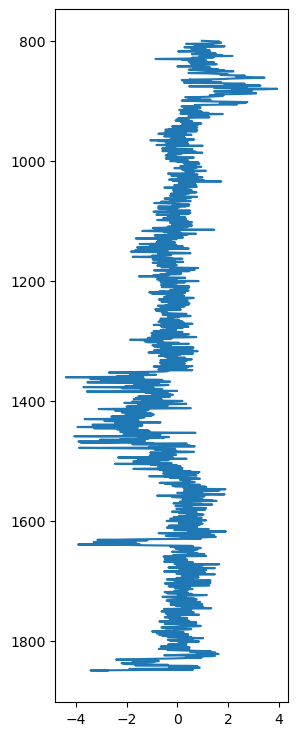

In [20]:
fig, ax = plt.subplots(figsize = (3,9))
#ax.plot(gr.values, profundidad)
ax.plot(gr_norm, profundidad)
ax.invert_yaxis()

In [1]:
import numba
import numpy as np

@numba.njit(parallel=True)
def parallel_sum(arr):
    total = 0
    for i in numba.prange(arr.size):
        total += arr[i]
    return total

arr = np.random.rand(1000000)
result = parallel_sum(arr)
print(result)


499865.33454102086


In [1]:
import numba
import numpy as np
import time

In [4]:
# Implementación con Numba
@numba.njit(parallel=True)
def parallel_sum(arr):
    total = 0
    for i in numba.prange(arr.size):
        total += arr[i]
    return total

# Implementación secuencial en Python puro
def sequential_sum(arr):
    total = 0
    for i in range(arr.size):
        total += arr[i]
    return total



In [7]:
# Generar datos de prueba
arr = np.random.rand(1000000)

# Medir tiempo de ejecución para Numba
start_time = time.time()
numba_result = parallel_sum(arr)
numba_time = time.time() - start_time

# Medir tiempo de ejecución para Python puro
start_time = time.time()
python_result = sequential_sum(arr)
python_time = time.time() - start_time

print(f"Resultado Numba: {numba_result}, Tiempo Numba: {numba_time:.4f} segundos")
print(f"Resultado Python: {python_result}, Tiempo Python: {python_time:.4f} segundos")

Resultado Numba: 500176.2788563373, Tiempo Numba: 0.0120 segundos
Resultado Python: 500176.2788563569, Tiempo Python: 0.8878 segundos


In [2]:
from welly import Synthetic